## Intro to Comprehend

In [1]:
import boto3
import glob
import pandas as pd
from dotenv import load_dotenv
from IPython.display import display
load_dotenv()

True

In [2]:
comprehend_client = boto3.client('comprehend')

In [3]:
text_to_analyze = "Amazon Comprehend is a powerful NLP service. It makes text analysis easy."

In [4]:
response = comprehend_client.detect_sentiment(
        Text=text_to_analyze,
        LanguageCode='en'
    )

In [5]:
response

{'Sentiment': 'POSITIVE',
 'SentimentScore': {'Positive': 0.9836823344230652,
  'Negative': 0.00037502680788747966,
  'Neutral': 0.014766361564397812,
  'Mixed': 0.0011762265348806977},
 'ResponseMetadata': {'RequestId': 'bf241d30-fced-4779-b1f1-f5917d192225',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'bf241d30-fced-4779-b1f1-f5917d192225',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '167',
   'date': 'Tue, 05 Aug 2025 20:08:57 GMT'},
  'RetryAttempts': 0}}

In [6]:
data = {
    'text': [
        "I am very happy with the new product.",
        "This is a terrible experience, I am so frustrated.",
        "The weather today is neutral and calm.",
        "What a fantastic achievement!",
        "I am not sure how I feel about this change.",
        "The service was absolutely dreadful.",
        "It's an okay movie, not great but not bad either.",
        "This is the best day of my life!",
        "The package arrived damaged and late.",
        "The instructions were clear and helpful.",
        # ... add more text entries to exceed 25 ...
        "This is just some filler text to make the list longer.",
        "Comprehend is a useful service for NLP tasks.",
        "Batch processing helps to improve efficiency.",
        "This is an example of a positive statement.",
        "I have a negative feeling about this project.",
        "The results are neither good nor bad.",
        "This is an excellent way to handle data.",
        "I'm disappointed with the outcome.",
        "The system works as expected.",
        "What a wonderful surprise!",
        "The support team was unresponsive.",
        "It's a standard procedure.",
        "This is truly innovative!",
        "The quality did not meet my expectations.",
        "I am content with the current situation.",
        "This is the 26th text, starting a new batch.",
        "Another item for the second batch.",
        "This is getting repetitive.",
        "One more for the road.",
        "Final text in the DataFrame."
    ]
}
df = pd.DataFrame(data)

In [7]:
sentiments = []

for i in df['text'].tolist():
    response = comprehend_client.detect_sentiment(
        Text=i,
        LanguageCode='en'
    )
    sentiments.append(response['Sentiment'])

df['sentiment'] = sentiments

display(df.head())

,text,sentiment
0,I am very happy with the new product.,POSITIVE
1,"This is a terrible experience, I am so frustra...",NEGATIVE
2,The weather today is neutral and calm.,POSITIVE
3,What a fantastic achievement!,POSITIVE
4,I am not sure how I feel about this change.,NEGATIVE


array([<Axes: ylabel='text'>], dtype=object)

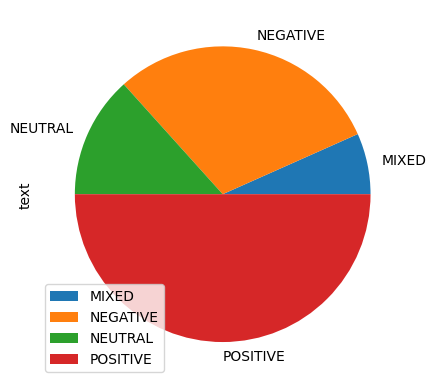

In [15]:
df.groupby(by='sentiment').count().plot.pie(subplots=True)